<a href="https://colab.research.google.com/github/shaileshsuthar675/Machine-Learning/blob/main/%20Sklearn%20Datasets/Iris%20Dataset/By_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting Google Drive Into Notebook

In [4]:
from google.colab import drive
drive.mount('/content/gdive') 

Mounted at /content/gdive


#Insert a data table for better visualisation of data

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Importing libraries...

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading the respective data file

In [6]:
from sklearn.datasets import load_iris
iris_df=load_iris()

In [7]:
dir(iris_df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

#Creating a dataframe for visualize the data into table form

In [8]:
df=pd.DataFrame(iris_df.data,columns=iris_df.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target']=iris_df.target

In [11]:
df['flower name']=df.target.apply([lambda x: iris_df.target_names[x]])

In [13]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
df.target.unique()

array([0, 1, 2])

#Visualize the data at different- different target value

In [15]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

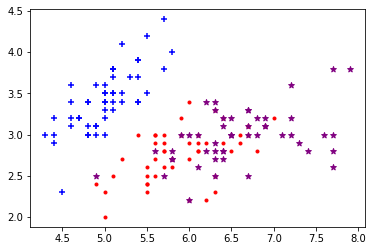

In [16]:
plt.scatter(x=df0['sepal length (cm)'],y=df0['sepal width (cm)'],color='blue',marker='+')
plt.scatter(x=df1['sepal length (cm)'],y=df1['sepal width (cm)'],color='red',marker='.')
plt.scatter(x=df2['sepal length (cm)'],y=df2['sepal width (cm)'],color='purple',marker='*')



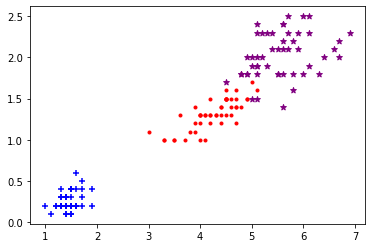

In [17]:

plt.scatter(x=df0['petal length (cm)'],y=df0['petal width (cm)'],color='blue',marker='+')
plt.scatter(x=df1['petal length (cm)'],y=df1['petal width (cm)'],color='red',marker='.')
plt.scatter(x=df2['petal length (cm)'],y=df2['petal width (cm)'],color='purple',marker='*')

#Build a ML Model...

In [18]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['target','flower name'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
len(x_test)

30

In [20]:
len(x_train)

120

In [26]:
from sklearn.svm import SVC
model=SVC(C=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667

#Confusion Metrix to indentify the accuracy level

In [27]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]])

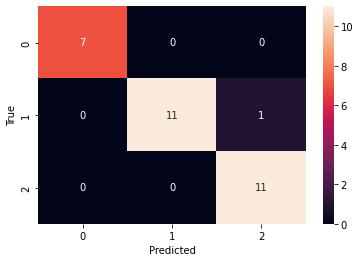

In [31]:
sns.heatmap(data=cm,annot=True);
plt.xlabel('Predicted');
plt.ylabel('True');